# k-Means on a randomly generated data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

<AxesSubplot:>

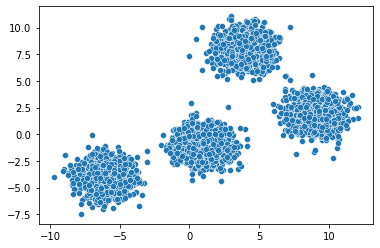

In [3]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples = 5000, centers = [[8,4], [2,9], [-4,-6], [-1, 1]], cluster_std = 1)
sns.scatterplot(x[:,1], x[:,0])
#px.scatter(x[:,1], x[:,0])

In [4]:
from sklearn.cluster import KMeans
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 8)
k_means.fit(x)

KMeans(n_clusters=4, n_init=8)

In [5]:
k_means.labels_

array([0, 2, 0, ..., 0, 2, 2])

In [6]:
k_means.cluster_centers_

array([[ 7.95463346,  3.95621437],
       [-4.00083075, -6.04397647],
       [-1.02753041,  0.9990712 ],
       [ 1.94469102,  9.02964729]])

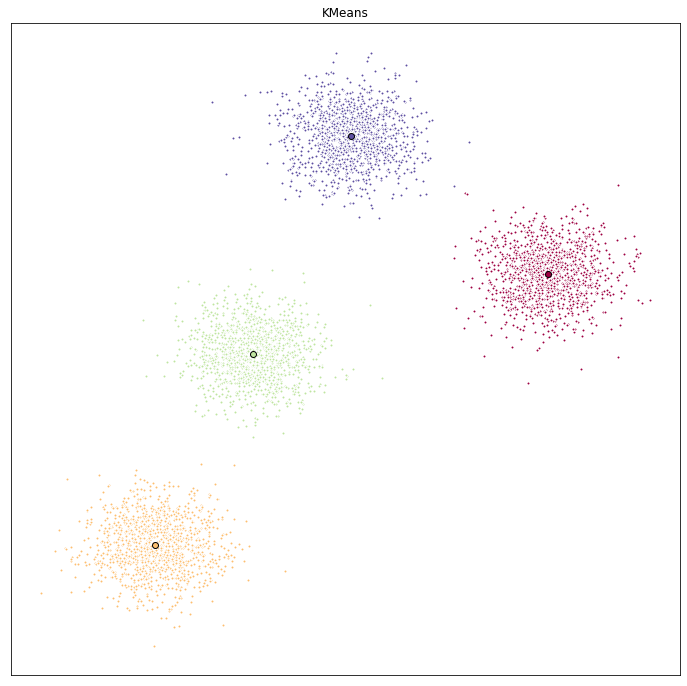

In [7]:
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(12, 12))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

In [ ]:
"""
k_means1 = KMeans(init = "k-means++", n_clusters = 3, n_init = 10)
k_means1.fit(x)
K_means1_label = k_means1.labels_
k_means1_cluster_center = k_means1.cluster_centers_
fig = plt.figure(figsize = (12,12))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(K_means1_label))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means1_cluster_center)), colors):
    my_members = (K_means1_label == k)
    cluster_center = k_means1_cluster_center[k]
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()
"""